# ***
GETTING DATA (eurusd, gbpusd, audusd, usdjpy for last 5 years)
# ***

In [2]:
import pickle
import requests
import json

[link] https://www.worldtradingdata.com/documentation#historical

In [3]:
url = 'https://api.worldtradingdata.com/api/v1/forex_history'
api_token = '3ENEPZ1ju2tZnPFWij9tKcOS7NdsmkwsxekbHAB5KOyWe23fmTen5HdScShE'

In [7]:
base = ['EUR', 'GBP', 'AUD', 'USD']
convert_to = ['USD', 'USD', 'USD', 'JPY']

In [8]:
date_from = '2015-01-01'
date_to = '2019-12-31'

In [14]:
for n in range(len(base)):
    params = {
    'base' : base[n],
    'convert_to' : convert_to[n],
    'api_token' : api_token,
    'date_from' : date_from,
    'date_to' : date_to,
    'sort' : 'oldest'
}
    response = requests.request('GET', url, params = params)
    data = response.json()
    
    name = 'data_' + base[n] + convert_to[n] + '.pickle'
    with open (name, 'wb') as file:
        pickle.dump(data, file, pickle.HIGHEST_PROTOCOL)

# ***
CREATING DATA SERIES
# ***

In [23]:
with open ('data_EURUSD.pickle', 'rb') as file:
    dict_EURUSD = pickle.load(file)

In [24]:
dict_items = dict_EURUSD['history'].items()

In [29]:
prices_EURUSD = []
days = []
for key, value in dict_items:
    prices_EURUSD.append(float(value))
    days.append(key)

# ***
PLOTING DATA
# ***

In [30]:
prices_EURUSD[0]

1.20872

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

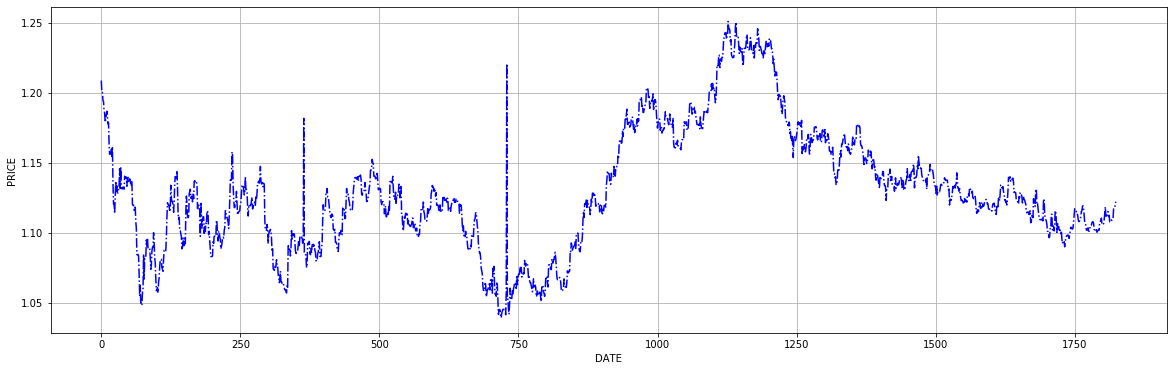

In [33]:
plt.figure(figsize = (20, 6))
plt.plot(prices_EURUSD[0:None], 'b-')
plt.xlabel('DATE')
plt.ylabel('PRICE')

plt.grid()
plt.show()